# HW 02 Programing

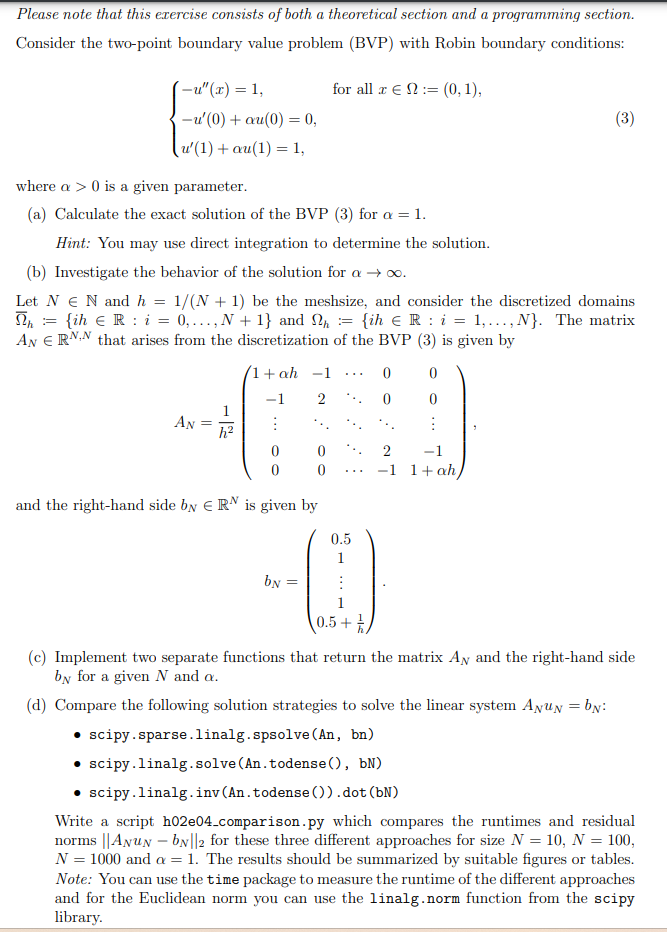

## part c - Discretization
For a given 𝑁 and 𝛼, we need to construct:
* Matrix $𝐴_{N}$: A tridiagonal matrix representing the discretized version of the differential operator.
* Vector $𝑏_{N}$: The right-hand side vector adjusted according to the problem statement

In [1]:
import numpy as np

def create_matrix_and_rhs(N, alpha):
    h = 1 / (N + 1)
    main_diag = (2 + alpha * h**2) * np.ones(N)
    off_diag = -1 * np.ones(N - 1)
    A_N = (1 / h**2) * (np.diag(main_diag) + np.diag(off_diag, -1) + np.diag(off_diag, 1))
    
    b_N = np.ones(N)
    b_N[0] = 0.5
    b_N[-1] = 0.5 + 1 / h
    return A_N, b_N


## part d - Solve the Linear System
Solving ${A_{N} u_{N} = 𝑏_{N}}$ using three methods and compare the results. 

In [2]:
import scipy.sparse.linalg as spla
import scipy.linalg as la
import time

def solve_and_compare(A_N, b_N):
    # Sparse solver
    start = time.time()
    u_sparse = spla.spsolve(A_N, b_N)
    time_sparse = time.time() - start
    
    # Dense solve
    start = time.time()
    u_dense = la.solve(A_N, b_N)
    time_dense = time.time() - start
    
    # Matrix inversion
    start = time.time()
    u_inv = la.inv(A_N).dot(b_N)
    time_inv = time.time() - start
    
    return u_sparse, u_dense, u_inv, time_sparse, time_dense, time_inv


## part e - Error Analysis
Calculate the error between the exact and approximate solutions for various values of 
𝑁
N and plot it on a log-log scale.

In [3]:
import matplotlib.pyplot as plt
import scipy.linalg as la

# Assuming exact_solution(N) gives the exact solution at points x_i for the given N
def plot_error_vs_resolution(alpha=1):
    errors = []
    resolutions = [2**k for k in range(4, 12)]
    
    for N in resolutions:
        A_N, b_N = create_matrix_and_rhs(N, alpha)
        u_sparse, _, _, _, _, _ = solve_and_compare(A_N, b_N)
        
        # Calculate error (norm of the difference)
        error = la.norm(u_sparse - exact_solution(N))
        errors.append(error)
    
    plt.loglog(resolutions, errors, 'o-')
    plt.xlabel('Resolution (N)')
    plt.ylabel('Error')
    plt.title('Error vs Resolution')
    plt.show()


## Part f - Behavious of increasing alpha
Calculate and plot solutions for ${𝛼=1,10,100,10^{5},10^{10},10^{20}}$ to observe the changes in boundary conditions.

In [4]:
def plot_solution_for_alpha(N=1000):
    alphas = [1, 10, 100, 1e5, 1e10, 1e20]
    x_vals = np.linspace(0, 1, N)
    
    for alpha in alphas:
        A_N, b_N = create_matrix_and_rhs(N, alpha)
        u_sparse, _, _, _, _, _ = solve_and_compare(A_N, b_N)
        plt.plot(x_vals, u_sparse, label=f'alpha={alpha}')
    
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.legend()
    plt.title('Solution for Increasing Values of alpha')
    plt.show()


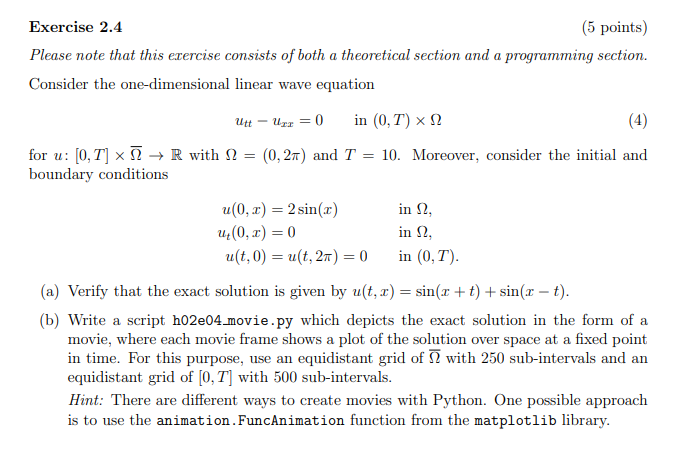

Using matplotlib.animation.FuncAnimation to create the animation, we can plot the solution at each time step and save the frames as a movie.

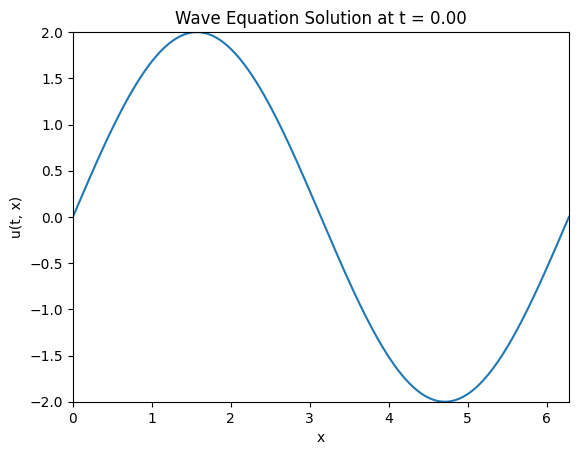

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define parameters
T = 10
x_min, x_max = 0, 2 * np.pi
num_x_points = 250
num_t_points = 500

# Generate grids
x = np.linspace(x_min, x_max, num_x_points)
t = np.linspace(0, T, num_t_points)

# Define the exact solution
def exact_solution(t, x):
    return np.sin(x + t) + np.sin(x - t)

# Set up the figure and axis
fig, ax = plt.subplots()
line, = ax.plot(x, exact_solution(0, x))
ax.set_xlim(x_min, x_max)
ax.set_ylim(-2, 2)
ax.set_xlabel("x")
ax.set_ylabel("u(t, x)")
ax.set_title("Wave Equation Solution")

# Animation function
def update(frame):
    y = exact_solution(t[frame], x)
    line.set_ydata(y)
    ax.set_title(f"Wave Equation Solution at t = {t[frame]:.2f}")
    return line,

# Create animation
ani = FuncAnimation(fig, update, frames=num_t_points, blit=True)
plt.show()

# Save the animation as a movie file
ani.save("wave_solution_movie.mp4", fps=30)
